<a href="https://colab.research.google.com/github/GDharan10/Dataset19_WaterQualityAndPotability_Classification/blob/main/Water_Quality_and_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
pip install lazypredict

# **Librarys**

In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Machine Learning Training
from sklearn.ensemble import RandomForestClassifier

#Machine Learning Evaluation
from sklearn.metrics import precision_score, recall_score

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/water_potability.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  \
0  NaN    204.89 20791.32         7.30   368.52        564.31           10.38   
1 3.72    129.42 18630.06         6.64      NaN        592.89           15.18   
2 8.10    224.24 19909.54         9.28      NaN        418.61           16.87   
3 8.32    214.37 22018.42         8.06   356.89        363.27           18.44   
4 9.09    181.10 17978.99         6.55   310.14        398.41           11.56   

   Trihalomethanes  Turbidity  Potability  
0            86.99       2.96           0  
1            56.33       4.50           0  
2            66.42       3.06           0  
3           100.34       4.63           0  
4            32.00       4.08           0

In [ ]:
df.shape

(3276, 10)

# **DataFrame observation**


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
# Dependent - Potability

continuous_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']
category_columns = ['Potability']

#Supervised Classification (Balanced)

# **Data cleaning using pandas**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.ph.unique()

array([       nan, 3.71608008, 8.09912419, ..., 9.41951032, 5.12676292,
       7.87467136])

In [ ]:
df.Sulfate.unique()

array([368.51644135,          nan, 356.88613564, ..., 258.93060041,
       345.70025734, 359.94857437])

In [ ]:
df.Trihalomethanes.unique()

array([86.99097046, 56.32907628, 66.42009251, ..., 69.84540029,
       77.4882131 , 78.69844633])

In [ ]:
df.ph.fillna(method = 'bfill', inplace = True)
df.Sulfate.fillna(method = 'ffill', inplace = True)
df.Trihalomethanes.fillna(df.Trihalomethanes.mean(), inplace = True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# **Hypothesis testing / Statistical analysis**


In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
df.corr()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
ph               1.00      0.07   -0.07        -0.02     0.01          0.02   
Hardness         0.07      1.00   -0.05        -0.03    -0.08         -0.02   
Solids          -0.07     -0.05    1.00        -0.07    -0.11          0.01   
Chloramines     -0.02     -0.03   -0.07         1.00     0.02         -0.02   
Sulfate          0.01     -0.08   -0.11         0.02     1.00         -0.01   
Conductivity     0.02     -0.02    0.01        -0.02    -0.01          1.00   
Organic_carbon   0.05      0.00    0.01        -0.01     0.01          0.02   
Trihalomethanes  0.01     -0.01   -0.01         0.02    -0.02          0.00   
Turbidity       -0.03     -0.01    0.02         0.00     0.01          0.01   
Potability       0.00     -0.01    0.03         0.02    -0.02         -0.01   

                 Organic_carbon  Trihalomethanes  Turbidity  Potability  
ph                         0.05             0.01      -0.03        0.00  
Hardness                   0.00            -0.01      -0.01       -0.01  
Solids                     0.01            -0.01       0.02        0.03  
Chloramines               -0.01             0.02       0.00        0.02  
Sulfate                    0.01            -0.02       0.01       -0.02  
Conductivity               0.02             0.00       0.01       -0.01  
Organic_carbon             1.00            -0.01      -0.03       -0.03  
Trihalomethanes           -0.01             1.00      -0.02        0.01  
Turbidity                 -0.03            -0.02       1.00        0.00  
Potability                -0.03             0.01       0.00        1.00

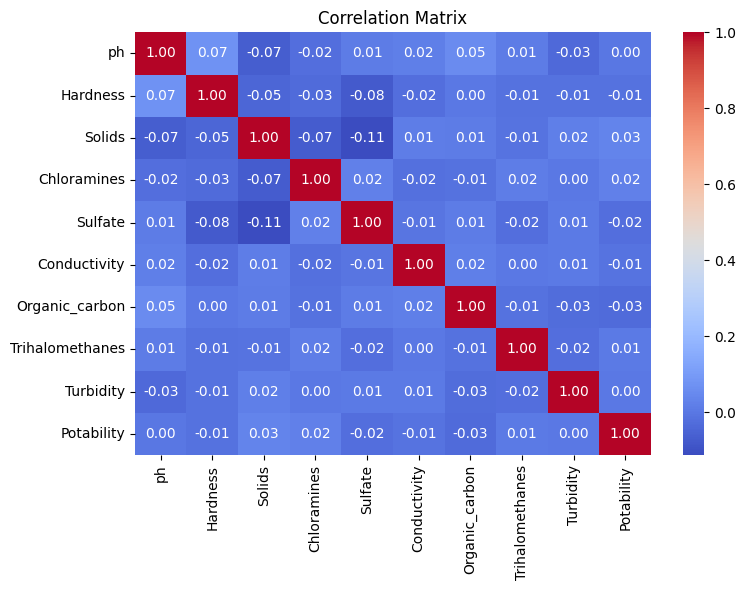

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

ph  \
Population Mean                                               7.07   
Sample Means                                   {7.083959000578417}   
H0_accepted                                                    324   
H0_rejected                                                    331   
Conclusion       H0 is rejected, Ha is accepted, There is a sig...   

                                                          Hardness  \
Population Mean                                             196.37   
Sample Means                                  {196.53565729002327}   
H0_accepted                                                    333   
H0_rejected                                                    322   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                            Solids  \
Population Mean                                           22014.09   
Sample Means                                  {22077.537307871396}   
H0_accepted                                                    341   
H0_rejected                                                    314   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                       Chloramines  \
Population Mean                                               7.12   
Sample Means                                  {7.1161869883387965}   
H0_accepted                                                    341   
H0_rejected                                                    314   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                           Sulfate  \
Population Mean                                             333.95   
Sample Means                                  {333.94281919661415}   
H0_accepted                                                    332   
H0_rejected                                                    323   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                      Conductivity  \
Population Mean                                             426.21   
Sample Means                                   {425.9565266886699}   
H0_accepted                                                    341   
H0_rejected                                                    314   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                    Organic_carbon  \
Population Mean                                              14.28   
Sample Means                                  {14.251691003657339}   
H0_accepted                                                    344   
H0_rejected                                                    311   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                   Trihalomethanes  \
Population Mean                                              66.40   
Sample Means                                   {66.34273972274214}   
H0_accepted                                                    354   
H0_rejected                                                    301   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                         Turbidity  
Population Mean                                               3.97  
Sample Means                                    {3.95901798403239}  
H0_accepted                                                    330  
H0_rejected                                                    325  
Conclusion       H0 is accepted, Ha is rejected, There is no si...

In [ ]:
comperativeColumn_result

ph                  Hardness  \
ph               There is no relationship  There is no relationship   
Hardness         There is no relationship   There is a relationship   
Solids           There is no relationship  There is no relationship   
Chloramines      There is no relationship  There is no relationship   
Sulfate          There is no relationship  There is no relationship   
Conductivity     There is no relationship  There is no relationship   
Organic_carbon   There is no relationship  There is no relationship   
Trihalomethanes  There is no relationship  There is no relationship   
Turbidity        There is no relationship  There is no relationship   
Potability        There is a relationship   There is a relationship   

                                   Solids               Chloramines  \
ph               There is no relationship  There is no relationship   
Hardness         There is no relationship  There is no relationship   
Solids            There is a relationship  There is no relationship   
Chloramines      There is no relationship   There is a relationship   
Sulfate          There is no relationship  There is no relationship   
Conductivity     There is no relationship  There is no relationship   
Organic_carbon   There is no relationship  There is no relationship   
Trihalomethanes  There is no relationship  There is no relationship   
Turbidity        There is no relationship  There is no relationship   
Potability        There is a relationship   There is a relationship   

                                  Sulfate              Conductivity  \
ph               There is no relationship  There is no relationship   
Hardness         There is no relationship  There is no relationship   
Solids           There is no relationship  There is no relationship   
Chloramines      There is no relationship  There is no relationship   
Sulfate           There is a relationship  There is no relationship   
Conductivity     There is no relationship   There is a relationship   
Organic_carbon   There is no relationship  There is no relationship   
Trihalomethanes  There is no relationship  There is no relationship   
Turbidity        There is no relationship  There is no relationship   
Potability        There is a relationship   There is a relationship   

                           Organic_carbon           Trihalomethanes  \
ph               There is no relationship  There is no relationship   
Hardness         There is no relationship  There is no relationship   
Solids           There is no relationship  There is no relationship   
Chloramines      There is no relationship  There is no relationship   
Sulfate          There is no relationship  There is no relationship   
Conductivity     There is no relationship  There is no relationship   
Organic_carbon    There is a relationship  There is no relationship   
Trihalomethanes  There is no relationship   There is a relationship   
Turbidity        There is no relationship  There is no relationship   
Potability        There is a relationship   There is a relationship   

                                Turbidity               Potability  
ph               There is no relationship  There is a relationship  
Hardness         There is no relationship  There is a relationship  
Solids           There is no relationship  There is a relationship  
Chloramines      There is no relationship  There is a relationship  
Sulfate          There is no relationship  There is a relationship  
Conductivity     There is no relationship  There is a relationship  
Organic_carbon   There is no relationship  There is a relationship  
Trihalomethanes  There is no relationship  There is a relationship  
Turbidity         There is a relationship  There is a relationship  
Potability        There is a relationship                      NaN

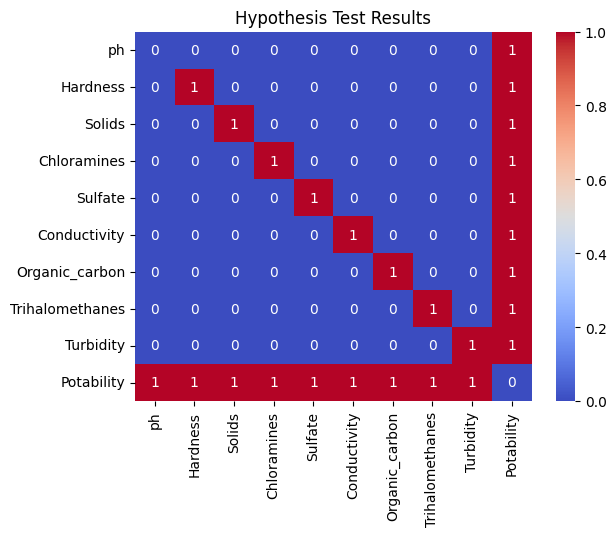

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# **Data Visualization**

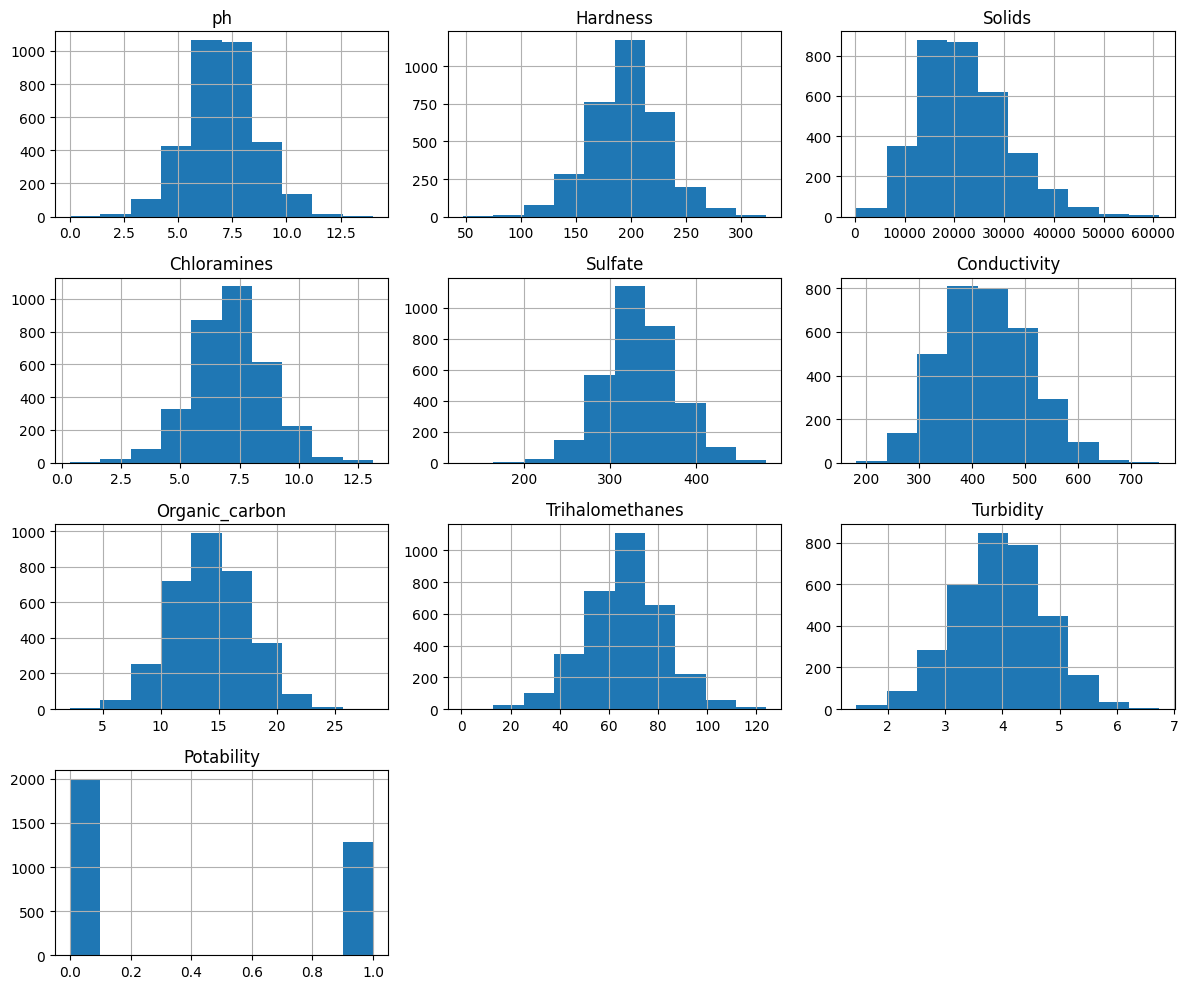

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

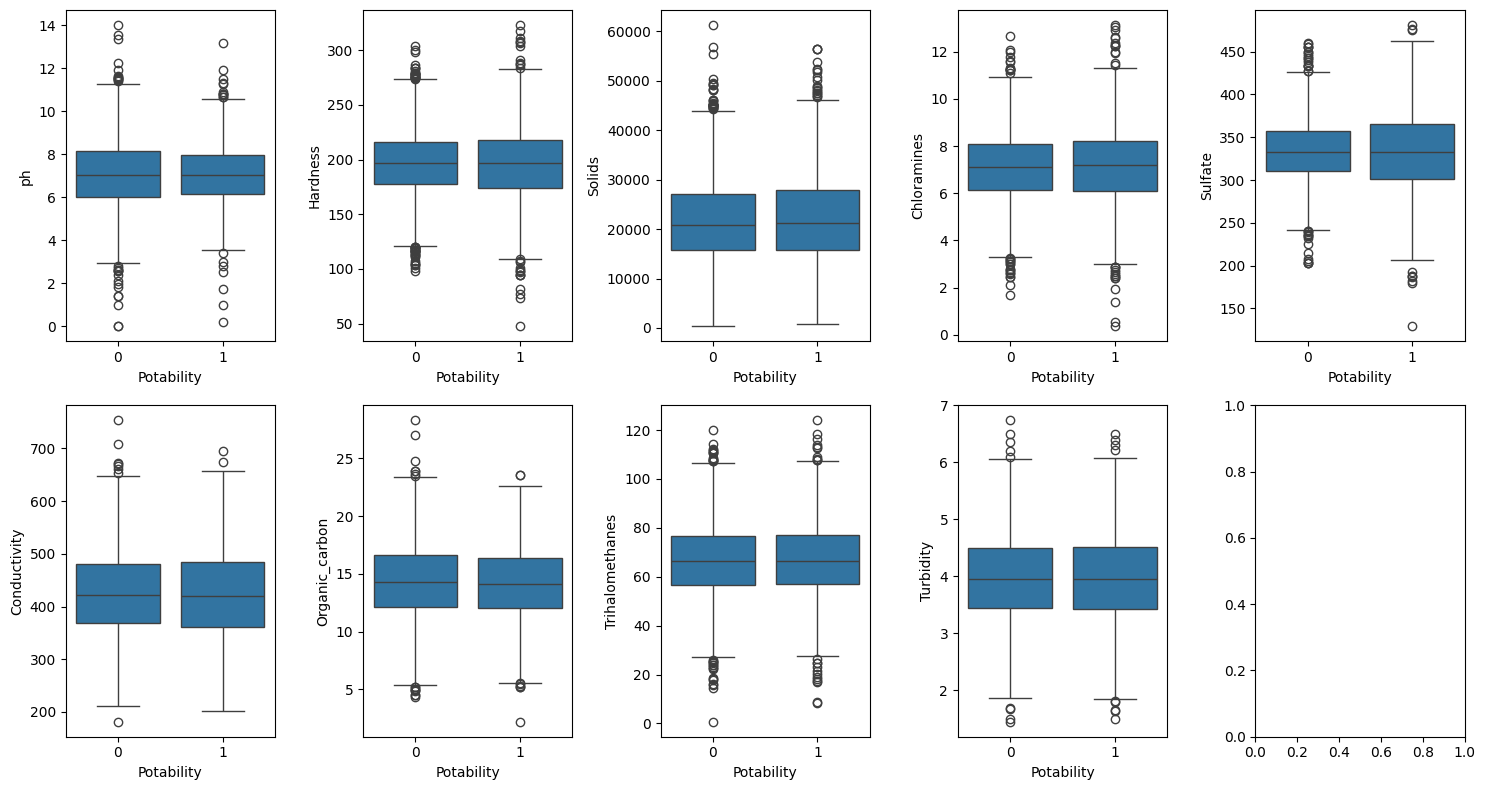

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x='Potability', y=column, data=df, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

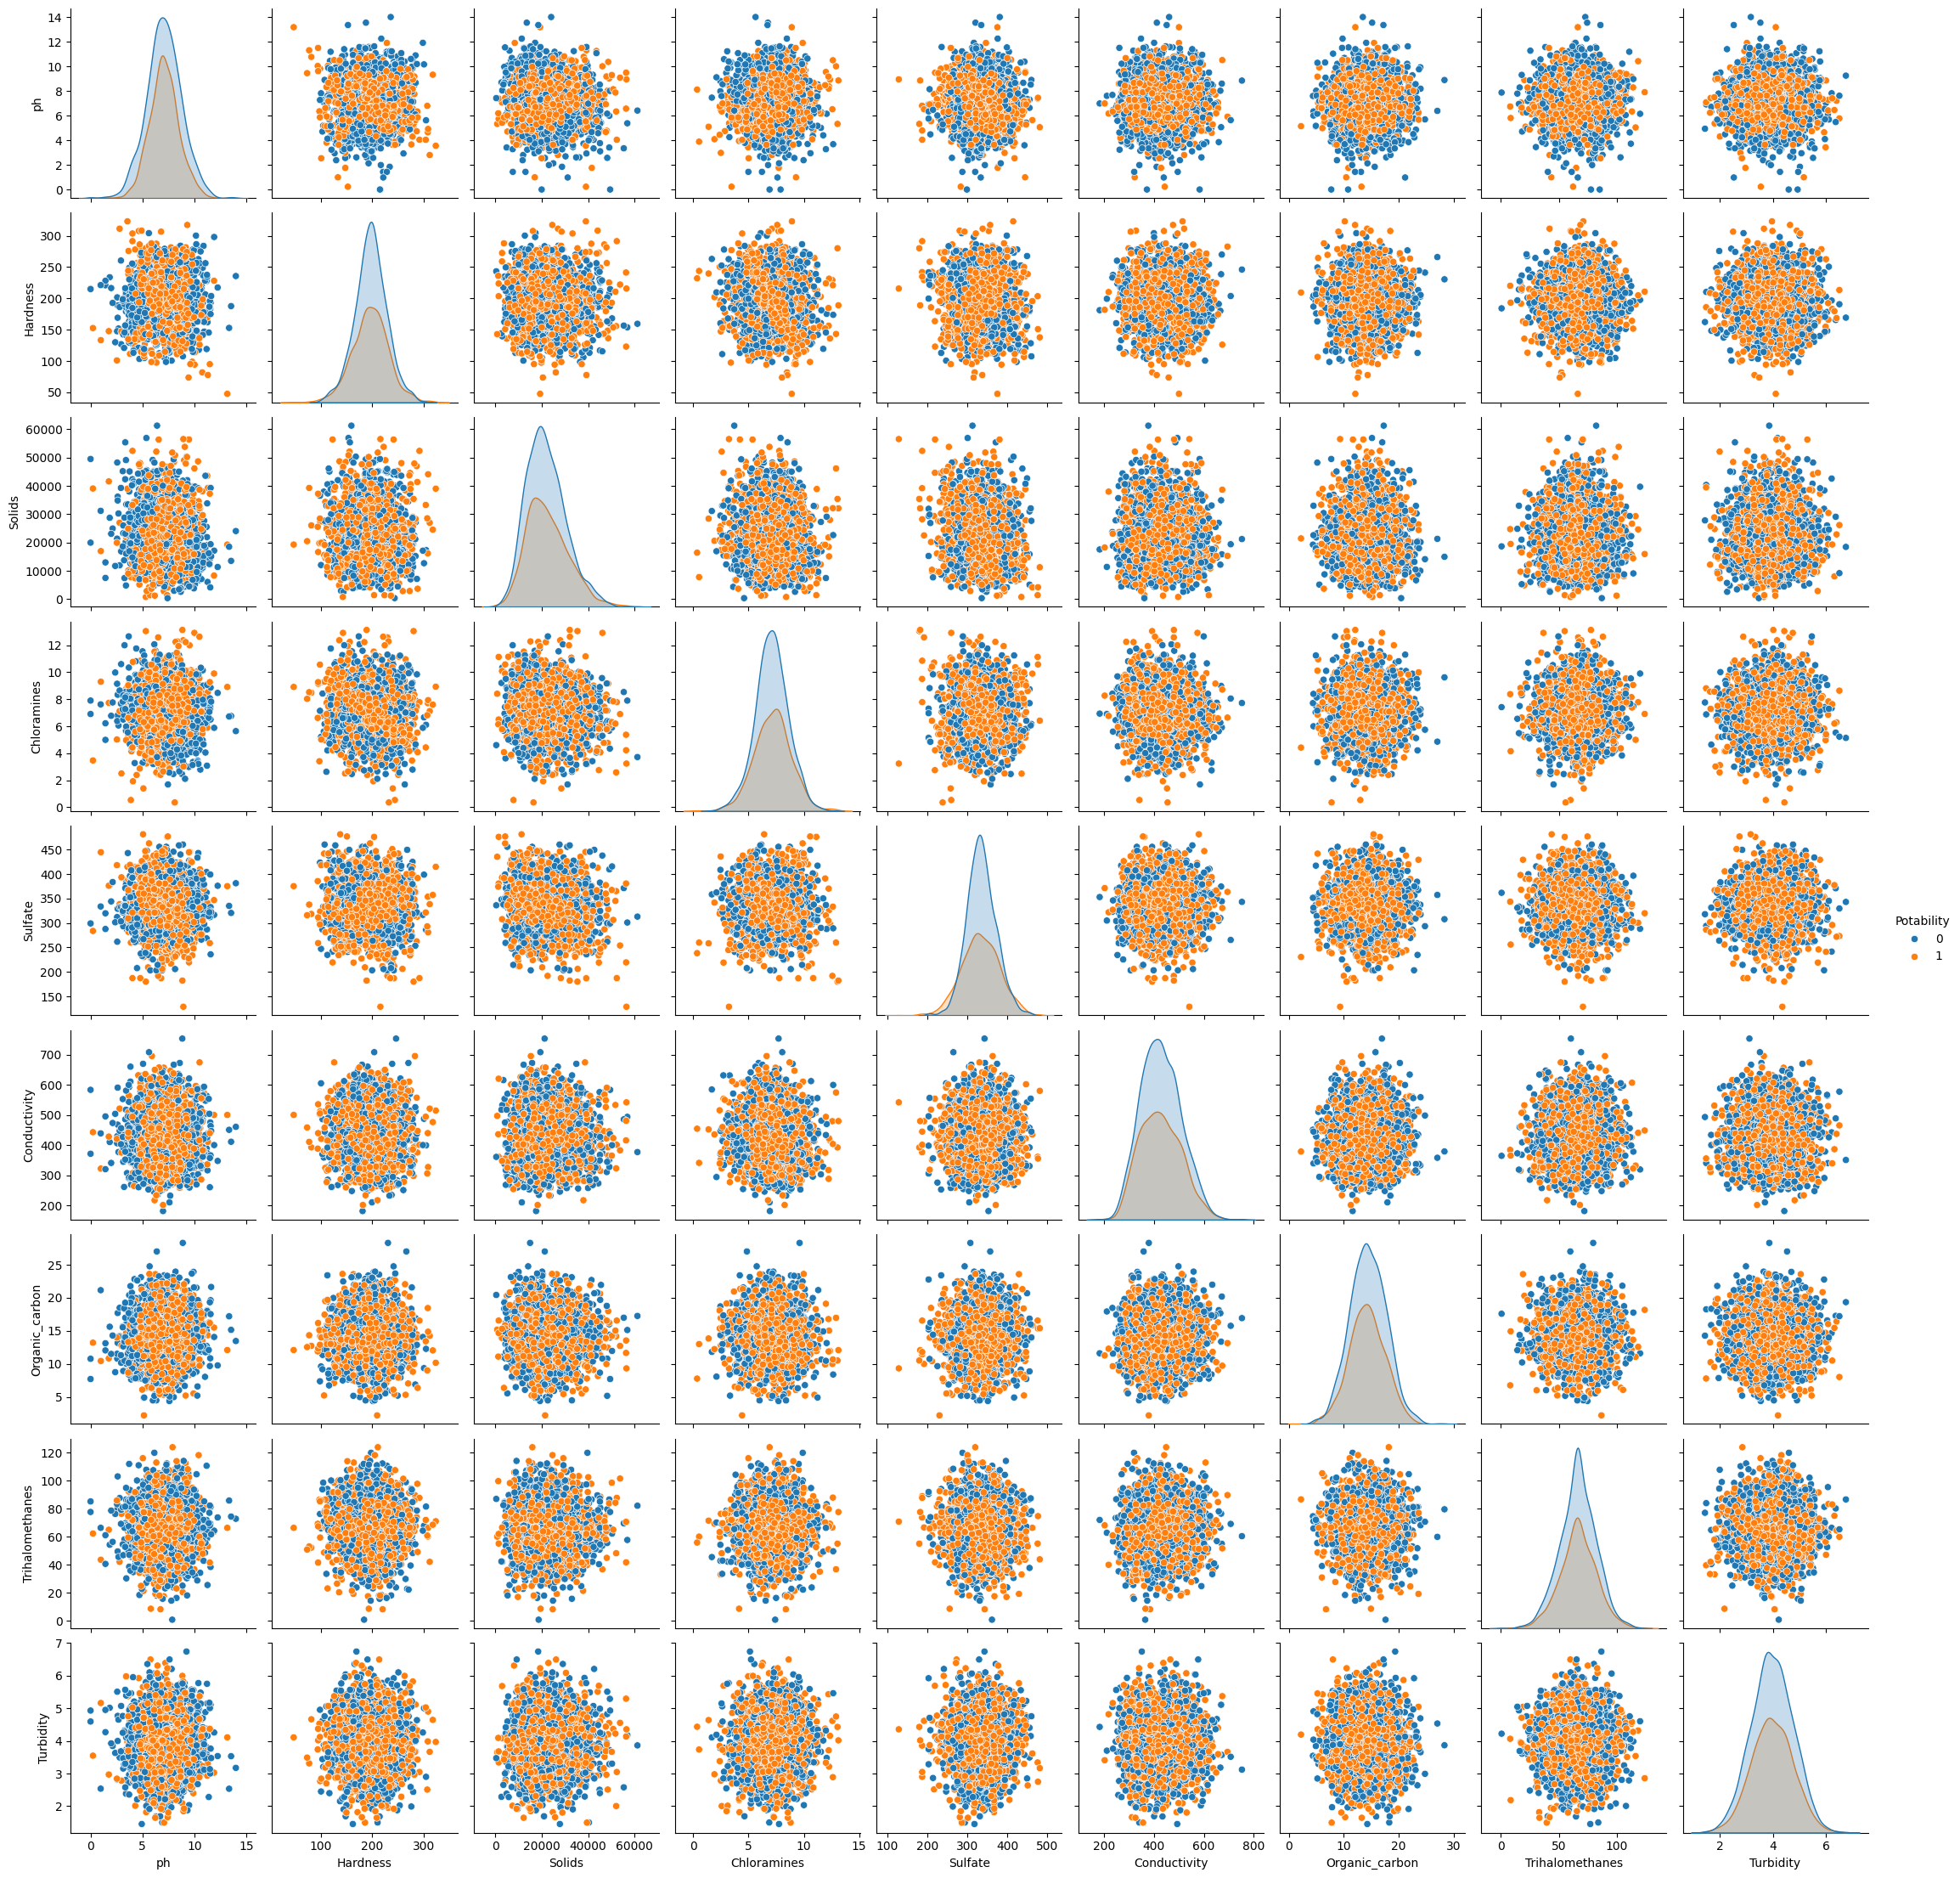

In [ ]:
sns.pairplot(df, hue='Potability', diag_kind='kde')
plt.show()

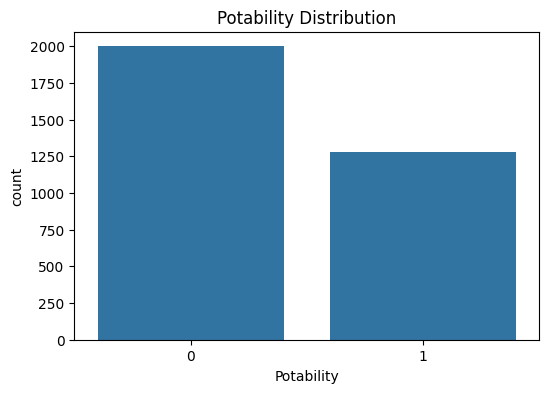

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title("Potability Distribution")
plt.show()

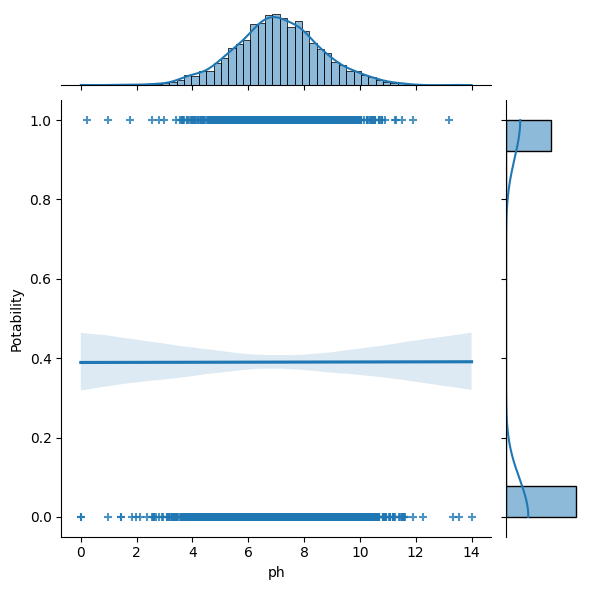

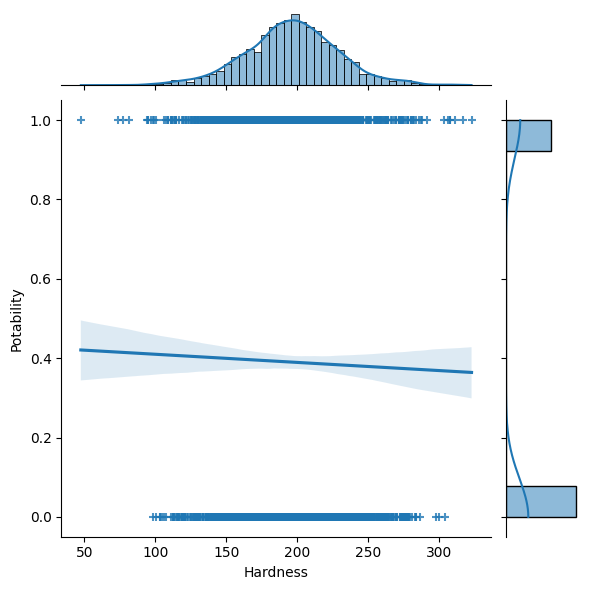

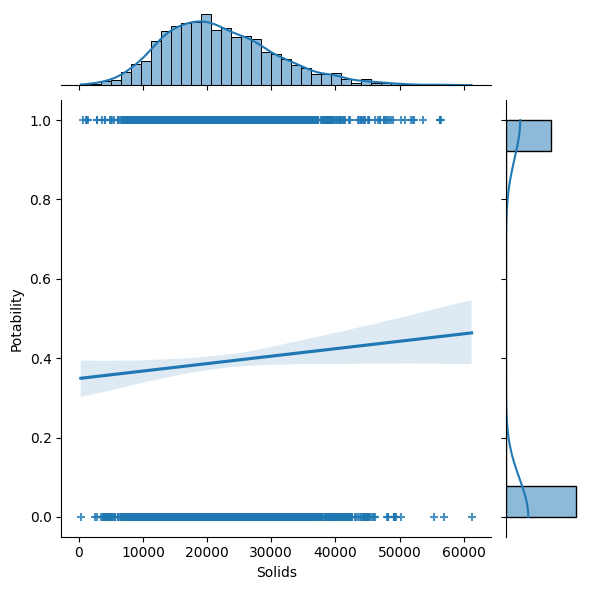

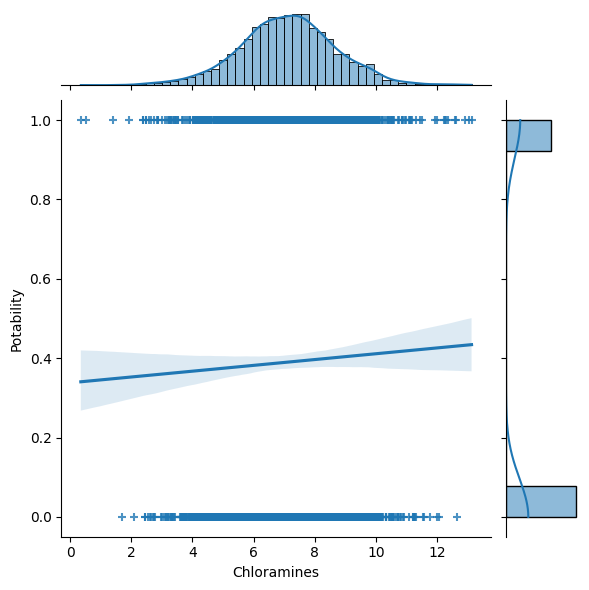

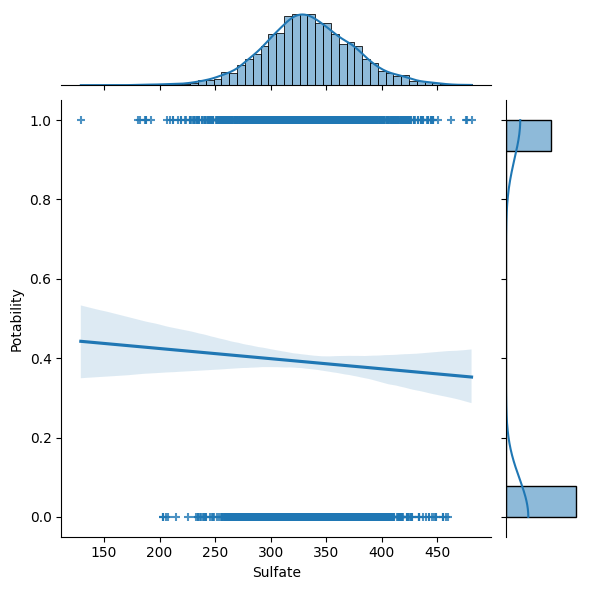

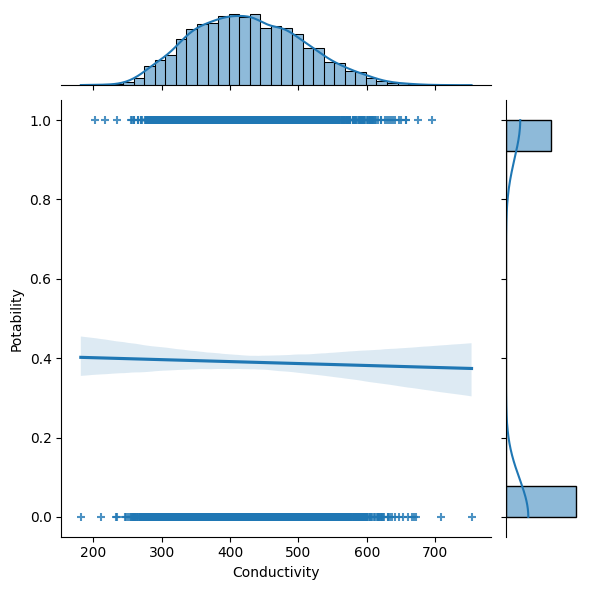

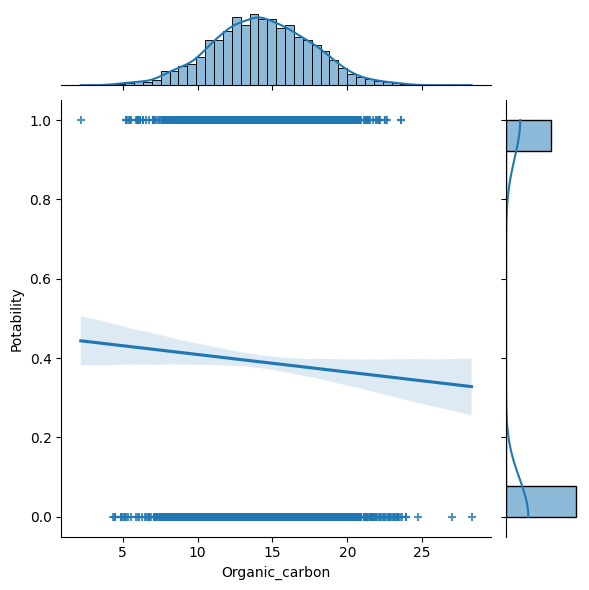

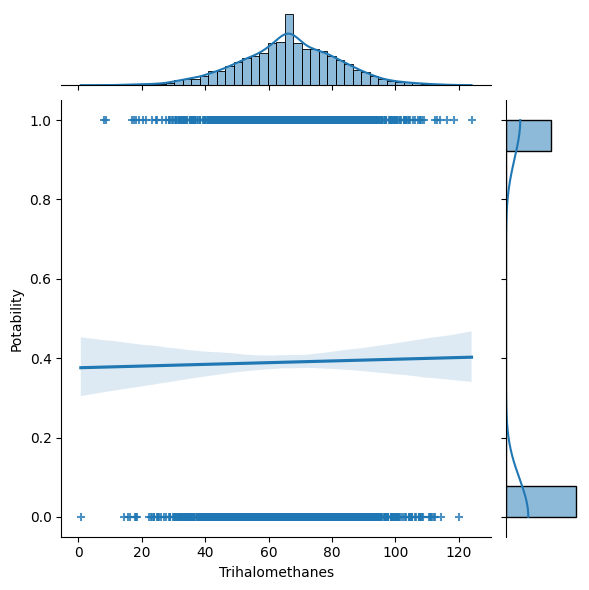

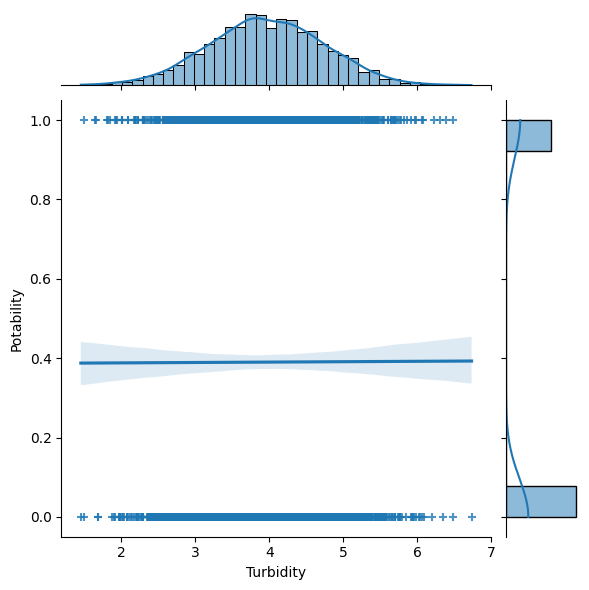

In [ ]:
for column in df.columns[:-1]:
    sns.jointplot(x=column, y='Potability', data=df, kind='reg', marker='+')
    plt.xlabel(column)
    plt.ylabel('Potability')
    plt.show()

# **Machine Learning**

**2 separating independent and dependent**

In [ ]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**3 Identifying algorithms/Model:**

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [00:12<00:00,  1.18it/s]

[LightGBM] [Info] Number of positive: 956, number of negative: 1501
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2457, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389092 -> initscore=-0.451129
[LightGBM] [Info] Start training from score -0.451129


100%|██████████| 29/29 [00:13<00:00,  2.19it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.66               0.61     0.61      0.64   
RandomForestClassifier             0.67               0.61     0.61      0.64   
QuadraticDiscriminantAnalysis      0.67               0.60     0.60      0.63   
LGBMClassifier                     0.65               0.60     0.60      0.63   
ExtraTreesClassifier               0.67               0.60     0.60      0.62   
SVC                                0.66               0.58     0.58      0.61   
LabelPropagation                   0.61               0.58     0.58      0.60   
XGBClassifier                      0.62               0.58     0.58      0.61   
LabelSpreading                     0.61               0.58     0.58      0.60   
KNeighborsClassifier               0.62               0.57     0.57      0.60   
DecisionTreeClassifier      

**4 training**

In [ ]:
model=RandomForestClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

**5 Evaluation**

In [ ]:
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps, rs

(0.631578947368421, 0.2981366459627329)